# Task #1
***

Write a Python function called `sqrt2`that calculates and prints to the screen the square root of 2 to 100 decimal places.
***

### Solution for the Task #1

During the lecture it was introduced the Newton's method to calculate $\sqrt{2}$ without using any module from the standard Python library or otherwise. The code below was taken from the lecture:

In [1]:
# A function to calculate the square root of a number x.
def sqrt():
    """
    A function to calculate the square root of a number x
    """
    # Initial guess for the square root z
    x = 2
    z = x / 2
    # Loop until we're happy with the accuracy
    while abs(x - (z * z)) > 0.000001:
        # Calculate a better guess for the square root.
        z -= (z*z - x) / (2*z)
    # Return the (approximate) square root of x.   
    return z

In [2]:
sqrt()

1.4142135623746899

For this assessment I've choosen to show how to calculate $\sqrt{2}$ using a different method - **Binary Search**.

### CALCULATION OF $\sqrt{2}$ USING BINARY SEARCH 

In computer science, **Binary Search**, also known as half-interval search,[1] logarithmic search,[2] or binary chop,[3] is a search algorithm that finds the position of a target value within a sorted array. [1]

It compares the middle number of the array with the searched value. If the middle number equals the searched value, the position of the middle number is returned. If the middle number is bigger, the left portion of the array is searched using the same logic (binary search), else the right portion of the array is searched using binary search. [2].

To find a square root of the value 2, we are going to serch for a number that falls in the range between lowest boundary = 0 and highest boundary = 2.

In [8]:
# import decimal module 
# as the precision using the floating point numbers is limited. A Python float have about 16 decimals of precision. Hawever,
from decimal import *
#as per Task#1, the answer has to have 100 decimal places, therefore the precision is equal 100 [4].
getcontext().prec = 100

def sqrt2():
    """
    A function to calculate the square root of a number 2
    """
    # lowest boundary value is equal 0, and the highest is equal 2. The square root of 2 should be between these two values.
    num = Decimal(2)
    low = Decimal(0)
    high = num
    
    # Our initial guess value will be the middle value between highest & lowest boundaries.
    guess = (high - low) / 2
    
    # Looping until the guess value neither equal low nor equal high values:
    while guess != low and guess != high:
        # calculating square of the guess value
        sqr = guess * guess
        
        # if square root of the guessed number equal the initial num, break the loop
        if sqr == num:
            break
        # otherwise if sqrt is less than our number 2 the low is getting a new value, which is equal guess
        elif(sqr < num):
            low = guess
        # otherwise the high is getting a new value, which is equal guess
        else:
            high = guess
        # guess is getting a new middle value (the formula: low + (high - low) / 2 is used instead of (high - low) / 2 , to help avoid overflow of 32-big integer)
        guess = low + (high - low) / 2
    
    # if guess is equal one of value of the boundaries
    else:
        # checking if the difference between squared low boundary minus initial number 2 is less than the difference between squared high boundary minus 2
        if abs(low * low - num) < abs(high * high - num):
            # if true, low is getting a new value, which is equal guess
            guess = low
        else:
            # otherwise high is getting a new value
            guess = high
    # returning the answer
    return guess

# printing the answer to 100 decimal places:
print(sqrt2())

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573


# Task #2
***

The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables
are independent. The Wikipedia article gives the table below as an example [4], stating the Chi-squared value based on it is approximately 24.6. Use `scipy.stats`
to verify this value and calculate the associated p value.

|  | A | B | C | D | Total |
| --- | --- | --- | --- | --- | --- |
| White collar | 90 | 60 | 104 | 95 | 349 |
| Blue collar | 30 | 50 | 51 | 20 | 151 |
| No collar | 30 | 40 | 45 | 35 | 150 |
| Total collar | 150 | 150 | 200 | 150 | 650 |

***

The **Pearson’s Chi-Squared test**, or just **Chi-Squared test** for short, is named for Karl Pearson, although there are variations on the test.

The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. The test calculates a statistic that has a chi-squared distribution, named for the Greek capital letter Chi $\chi$ pronounced “ki” as in kite.[10].

The result of the test is a test statistic that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption or null hypothesis that the observed and expected frequencies are the same.

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

* If **Statistic >= Critical Value**: significant result, reject null hypothesis (H0), dependent.
* If **Statistic < Critical Value**: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

* If **p-value <= ignificance level**: significant result, reject null hypothesis (H0), dependent.
* If **p-value > ignificance level**: not significant result, fail to reject null hypothesis (H0), independent.

### Solution for the Task #1

Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". [4].

The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification. 

The data are tabulated above in the Task #2 section.

In [23]:
import numpy as np
from scipy import stats

# Input the data.
white = [90, 60, 104, 95]
blue = [30, 50, 51, 20]
no = [30,  40,  45, 35]

# creating an array from the data above
table = np.array([white, blue, no])

# runing the Chi-squared test using scipy.stats library
# Chi2_st is chi-square statistic
# p_val is a p-value
# dof = degrees of freedom (is calculated by taking the number of rows minus one 
# and multiplying this result by the number of columns minus one)
# con_tbl is a contingency table with expected values based on all of our samples.
chi2_st, p_val, dof, con_tbl = stats.chi2_contingency(table)

# probability
prob = 0.95

#calvulating the critical value
critical = chi2.ppf(prob, dof)

#Output
print("Initial table:")
print(table)
print("")
print("p-value = ",format(p_val, '.5f'))
print("Degrees of freedom = ",dof)
print("Chi-squared statistic = ", format(chi2_st, '.1f'))
print("Critical value = ", format(critical, '.1f'))

Initial table:
[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]]

p-value =  0.00041
Degrees of freedom =  6
Chi-squared statistic =  24.6
Critical value =  12.6


P-value (0.00041) is less than the significance level (0.05), therefore it's statistically significant. This means there’s only about a 0.04% chance that we’d see this result if the person's neighborhood of residence were truly random.

The Chi-squared statistics is greater than the Critical value, therefore based on this we can reject the null hypothesis (H0), as the result is significant.

In [24]:
print("Contingency table")
print(con_tbl)

Contingency table
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


The contingency table produced values that are, in some cases, quite different comparing to the initial dataset. This is because we are using too small of a sample to accurate measure the population.

# Task #3
***

The standard deviation of an array of numbers x is calculated using numpy as `np.sqrt(np.sum((x - np.mean(x))**2)/len(x))`. However, Microsoft Excel has two different versions of the standard deviation calculation, `STDEV.P` and `STDEV.S`. The `STDEV.P` function performs the above calculation but in the `STDEV.S` calculation the division is by `len(x)-1` rather than `len(x)`. Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use `numpy` to perform a simulation demonstrating that the `STDEV.S` calculation is a better estimate for the standard deviation of a population when performed on a sample. 

*Note that part of this task is to figure out the terminology in the previous sentence.

To create a sample we will be using Normal (Gaussian) distribution. 
The normal distributions occurs often in nature. For example, it describes the commonly occurring distribution of samples influenced by a large number of tiny, random disturbances, each with its own unique distribution. [20]

random.normal() requires three parameters:
    loc - (Mean) where the peak of the bell exists.
    scale - (Standard Deviation) how flat the graph distribution should be.
    size - The shape of the returned array.


C:\Users\I304319\Anaconda3_2020-07\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


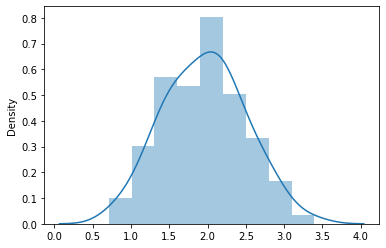

In [7]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters for two different lists of numbers.
loc = 2.0
scale = 0.5
size = 100

# Create a list of numbers based on bell-shaped probability curves.
df = random.normal(loc, scale, size)

#Visualization of the numbers in the array
sns.distplot(df)

plt.show()

#### Reference List:

[1]. Binary search algorythm. https://en.wikipedia.org/wiki/Binary_search_algorithm#:~:text=In%20computer%20science%2C%20binary%20search,middle%20element%20of%20the%20array. 8 Nov 2020
[2]. Square Root using Binary Search: https://algotree.org/algorithms/binary_search/squareroot/ 26 Oct 2020
[2a]. Finding the Square Root of a number using Binary Search (Java). https://stackoverflow.com/questions/61936060/finding-the-square-root-of-a-number-by-using-binary-search 26 Oct 2020

[3]. Find square root of a number using Binary Search algorithm https://www.techiedelight.com/find-square-root-using-binary-search-algorithm/ 26 Oct 2020
[4]. Wikipedia contributors, “Chi-squared test — Wikipedia, the free encyclopedia,”
2020, [Online; accessed 1-November-2020]. [Online]. Available: https://en.wikipedia.
org/w/index.php?title=Chi-squared test&oldid=983024096
[5]. Decimal fixed point and floating point arithmetics https://docs.python.org/3/library/decimal.html

[1]. How do I write a program for finding the square root of a number without using the sqrt function?. https://www.quora.com/How-do-I-write-a-program-for-finding-the-square-root-of-a-number-without-using-the-sqrt-function
[2]. https://algotree.org/algorithms/binary_search/squareroot/
[3]. https://codereview.stackexchange.com/questions/226340/compute-the-square-root-of-a-positive-integer-using-binary-search
[4]. Java: https://stackoverflow.com/questions/61936060/finding-the-square-root-of-a-number-by-using-binary-search
[5]. Python, Java and C: https://www.xspdf.com/resolution/54877450.html
[6]. https://inginious.org/course/competitive-programming/binsearch-squareroot
[7]. https://www.techiedelight.com/find-square-root-using-binary-search-algorithm/
[8]. C: https://stackoverflow.com/questions/40849402/using-binary-search-to-find-the-square-root-of-a-number-in-c/40849680
[9]. https://stackoverflow.com/questions/52176199/binary-search-for-square-root-2
[10]. https://www.geeksforgeeks.org/find-square-root-number-upto-given-precision-using-binary-search/


[10]. A Gentle Introduction to the Chi-Squared Test for Machine Learning. https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ (8 Nov 2020)
[11]. Running Ch-Square Tests with Die Roll Data in Python. https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b 8 Nov 2020
[12]. SciPy.org. Scipy.stats.ch2_contingency. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html 8 Nov 2020
[13]. Chi-square test in Python. https://reneshbedre.github.io/blog/chisq.html#:~:text=cured%20and%20noncured)-,Chi%2Dsquare%20(%CF%872)%20Goodness%20of%20Fit%20test,on%20the%20known%20theoretical%20expectation. 8 Nov 2020
[14]. A Gentle Introduction to the Chi-Squared Test for Machine Learning. https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ (8 Nov 2020)
[15]. SciPy.org. Scipy.stats.chi2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html. 8 Nov 2020

[20]. Numpy. https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html 24 Nov 2020


[11]. LaTex. https://en.wikibooks.org/wiki/LaTeX/Mathematics. 26 Oct 2020
[12]. Markdown in Jupyter Notebook. https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034349&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=20489&gclid=CjwKCAjwoc_8BRAcEiwAzJevtX4RINIUMp_KK-_GyNV1X-ptLEtPDfvJ9VBN2BUdNU4cR-XXIoXPBxoCNYwQAvD_BwE 26 Oct 2020